### Analysis of Fixed Broadband Connection Speeds

David Kahn <br>
Final Project <br>
1/9/2017 <br>


# WARNING!!!
This code will take a long time to run, and requires much of your computer’s hard drive read/write time, as well as most (depending on how much is available) of your ram. I have run the file to the extent that I think necessary to show the data, but if you choose to run it, you do so at your own risk. I, David Kahn, take no responsibility for any information lost, or any other unwanted occurrence, due to the system crashing, or some other unwanted event caused by the program’s needs. To change how much data is run, you can change the numofrows and numofreads variables. numofrows tells the computer how many rows it should read from the csv file at a time (this most signifiantly impacts computer performance). numofreads tells the computer how many iterations of numofrows you want to read. For example, choosing 1,000 for numofrows and 10 for numofreads, will tell the computer to read 1,000 rows of the csv and do so 10 times, essentially reading 10,000 rows of the data. I have selected 5,000,000 for numofrows and 10 for numofreads, totaling up to a staggering 50,000,000 rows of the data.

To ensure that the program leaves as little information as possible in the systems memory, I have cleared all of the clearable files that the program is using and storing in ram. This is done with gc.collect() which is a python function that forces python to release (delete) what information it can that is being stored in the system memory by the program (this does not impact any other part of the system, only what is being used for the program itself). If for some reason gc.collect() does not function as I expected it would, and causes an unwanted occurrence, I, David Kahn, take no responcibility for any damage of any kind that was caused by the use of the previously listed function.

You, the user of this program, take full responcibility for any of your actions following this warning, and recognise the possible outcomes of running the code. If you do not accept these conditions, then do not continue. If you do agree to these conditions, then I hope that you find the information to be as fascinating as I do. 

If you would like to download the file (it is too large (10.5GB) to submit to GitHub), then go to http://transition.fcc.gov/form477/BroadbandData/Fixed/Dec15/Version%202/US-Fixed-with-Satellite-Dec2015.zip
<br>
Then unzip the file and place it in the same folder as this program file.

<br>
<br>
In This project, I analyze the relationship between a states average internet speed, and its average household yearly income. Knowing this information could potentially be useful for ISP's to know in order to offer different prices for data speeds for each state. It culd also be useful for homeowners to know so they can take into account the internet speed to their house, and how much they make, in order to find the least costly way to get a high speed.

In [29]:
#imports
import time 
import csv
import statistics as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gc
% matplotlib inline


#keeping track of time
t0 = time.time();


#create dict of state abbreviations
StateList = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"];


def maxdown (all_data_file, abbrevlist):
    data = all_data_file.query('StateAbbr in @abbrevlist'); #if want to specify range use  & MaxAdDown >= 15 <= 100
    try:
        return(st.mean(data["MaxAdDown"]));
    except:
        return(0);
    
numofrows = 5000000;
numofreads = 10;
#failedreads = 0;

avglist = [];
numlist = [];

for i in range(50):
    avglist.append(0);
    numlist.append(i);

for amount in range(numofreads):
    print(amount);
    #file reading
    #Data from https://www.fcc.gov/general/broadband-deployment-data-fcc-form-477
    #encoding method from http://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python by user Stefan.
    #skipping rows method from http://stackoverflow.com/questions/27325652/python-pandas-read-csv-skip-rows-but-keep-header by user ajcr.
    all_data_file = pd.read_csv("fbd_us_with_satellite_dec2015_v2.csv", encoding = "ISO-8859-1", skiprows=range(1, numofrows*amount), nrows=numofrows, skip_blank_lines=True);
    print('section ', amount, ' read confirmed');
    for val in range(len(StateList)):
        tmplst = [''];
        tmplst[0] = StateList[val];
        #print('state: ', StateList[val], ' ', maxdown(all_data_file, tmplst));
        avglist[val] = avglist[val] + maxdown(all_data_file, tmplst)
        #if maxdown(all_data_file, tmplst) == 0:
            #failedreads = failedreads + 1;
        #print('section ', amount, ' state ', val, ' confirmed');
    print('section ', amount, ' value storage confirmed');
    
    
for j in range(len(avglist)):
    avglist[j] = avglist[j]/numofreads;#-failedreads);

for k in range(len(avglist)):
    print(avglist[k], StateList[k]);

#print elapsed time
print('Elapsed total time : ', time.time() - t0);

#to ensure that ram is not used up even if program is not running, clears all stored data from program in ram.
#idea from http://stackoverflow.com/questions/32247643/how-to-delete-multiple-pandas-python-dataframes-from-memory-to-save-ram from user shanmuga
gc.collect();

0
section  0  read confirmed
section  0  value storage confirmed
1
section  1  read confirmed
section  1  value storage confirmed
2
section  2  read confirmed
section  2  value storage confirmed
3
section  3  read confirmed
section  3  value storage confirmed
4
section  4  read confirmed
section  4  value storage confirmed
5
section  5  read confirmed
section  5  value storage confirmed
6
section  6  read confirmed
section  6  value storage confirmed
7
section  7  read confirmed
section  7  value storage confirmed
8
section  8  read confirmed
section  8  value storage confirmed
9
section  9  read confirmed
section  9  value storage confirmed
47.4867241961 AL
47.0203039298 AK
33.4275913599 AZ
45.4856025972 AR
29.213537086 CA
32.8621958224 CO
31.9813226645 CT
26.7096569831 DE
37.4577570673 FL
45.3510599006 GA
11.5498113349 HI
28.6484686955 ID
18.9465006968 IL
34.1364502464 IN
25.2669466474 IA
30.4519855873 KS
32.7668944395 KY
74.9154717027 LA
14.9600077451 ME
22.5508256085 MD
26.06825047

The data has a correlation coefficient (r-value) of -0.0702078170984


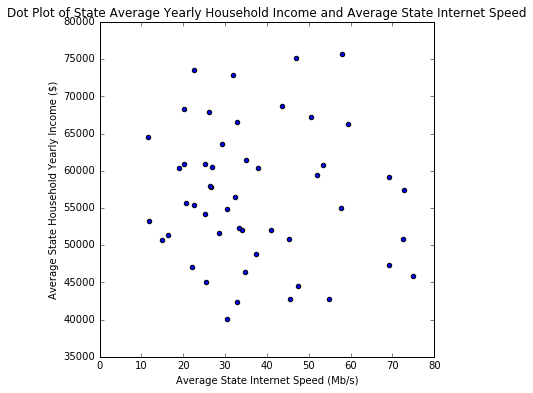

In [53]:
import scipy.stats as ss

raw_data = open("raw_data.csv", "r", errors="ignore");
#file was edited for convenience, so that all that is being iterated through is the values, none of the descriptions

incomelist = [];

for i in raw_data:
    incomelist.append(i);

for j in raw_data:
    incomelist[j] = incomelist[j].split(",");

for m in range(len(incomelist)):
    incomelist[m] = incomelist[m].split(",");
    
incomeval = [];

for n in range(len(incomelist)):
    incomeval.append(incomelist[n][1]);

for o in range(len(incomeval)):
    incomeval[o] = incomeval[o].split("\n");
    
for p in range(len(incomeval)):
    incomeval[p] = float(incomeval[p][0]);

plt.figure(figsize=(6,6));
plt.xlabel("Average State Internet Speed (Mb/s)")
plt.ylabel("Average State Household Yearly Income ($)")
plt.title("Dot Plot of State Average Yearly Household Income and Average State Internet Speed")
plt.scatter(avglist, incomeval);

stats = ss.linregress(avglist, incomeval);
print("The data has a correlation coefficient (r-value) of", stats[2]);

In the dot plot shown above, it is evident that internet speed and average household yearly income have little to no affect on each other. With a correlation coefficient of -0.070... using a linear regression, the data has neither an increase/decrease caused by a change in the other. Indeed the correlation coefficient is negative, however this is by such a small amount that it can be considered negligable for this circumstance. What this plot does show us however, is that there are other leading factors to the average internet speed in a state. One of these could be the number of tech companies. If there is a high number of tech companies, then there tends to be an increase in the state average internet speed because those companies count as internet users, as well as an increase in the speeds of the surrounding area of a tech company.